## Final Project Submission


 * Neal Iyer
 * Self Pace/Flex



# <span style="color: Green;">Data Introduction Summmary</span>

## <span style="color: lightGreen;">Introduce Data before presenting it in code below</span>

##### First step is to import pandas and matplot lib in order to run the code needed to analyze the data.

## <span style="color: forestGreen;">Importing Pandas and Opening Datafile to Inspect and analyze elements</span>

In [2]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
planes_df = pd.read_csv('Aviation_Data.csv')
planes_df.sort_values(by=('Total.Fatal.Injuries'), ascending=False)

C:\Users\neali\AppData\Local\Temp\ipykernel_9152\1510018960.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  planes_df = pd.read_csv('Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
40881,20020124X00116,Accident,DCA97WA007B,1996-11-12,"New Delhi, India",India,NaN,NaN,NaN,NaN,...,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002
40882,20020124X00116,Accident,DCA97WA007A,1996-11-12,"New Delhi, India",India,NaN,NaN,NaN,NaN,...,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002
75734,20140718X92314,Accident,DCA14RA127,2014-07-17,"Hrabove, Ukraine",Ukraine,NaN,NaN,NaN,NaN,...,NaN,MALAYSIAN AIRLINES SYSTEM BERHAD,295.0,0.0,0.0,0.0,NaN,NaN,NaN,13-09-2021
22082,20001213X27403,Accident,DCA89RA014,1988-12-21,"LOCKERBIE, United Kingdom",United Kingdom,NaN,NaN,NaN,NaN,...,Unknown,NaN,270.0,2.0,3.0,0.0,UNK,NaN,Foreign,07-02-1995
51769,20011130X02321,Accident,DCA02MA001,2001-11-12,"Belle Harbor, NY",United States,NaN,NaN,JFK,John F. Kennedy International,...,NaN,NaN,265.0,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,14-04-2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90004,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90090,NaN,20-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <span style="color: skyblue;">After viewing the layout of the data, it is time to further filter and identify the different columns and datatypes of the file</span>.




In [4]:
planes_df.info
planes_df.dtypes
planes_df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
planes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### As we can see, most columns are objects, with a few float64 (integer) columns.  Now, I will create an adittional column titled "Total Injuries" that acts as a weighted measure of total fatal injuries, total serious injuries, and total minor injuries.

In [6]:
#create new column documenting total injuries, fatal + major + minor

planes_df['Total.Fatal.Injuries'].fillna(0, inplace=True) 
planes_df['Total.Serious.Injuries'].fillna(0,inplace=True)
planes_df['Total.Minor.Injuries'].fillna(0,inplace=True)
planes_df['Total Injuries'] = planes_df['Total.Fatal.Injuries'] * 0.6 + planes_df['Total.Serious.Injuries'] * 0.4 + planes_df['Total.Minor.Injuries'] * 0.2
planes_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

# <span style="color: brown;">Data Analysis</span>
### At this step in the process, we will begin compartmentalizing data and taking detailed looks at each aspect we want to investigate further in order to discover appropriate stakeholder solutions.  
#### First step- analyze number of total injuries per Number of Engines.

In [20]:
num_eng = planes_df.groupby('Number.of.Engines')['Total Injuries'].sum().reset_index()
num_eng_sorted = num_eng.sort_values(by='Total Injuries', ascending=False)
num_eng_sorted


,Number.of.Engines,Total Injuries
1,1.0,22399.8
2,2.0,8586.8
4,4.0,1193.8
3,3.0,894.8
0,0.0,522.6
6,8.0,9.0
5,6.0,0.0


#### Create Visualization highlighting above analysis

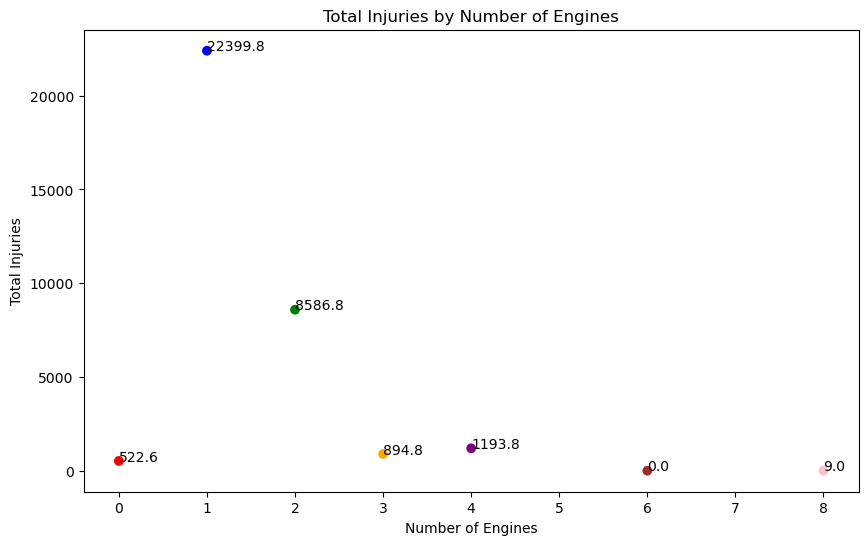

In [26]:
# Define a list of colors, one for each bar
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(num_eng_sorted['Number.of.Engines'], num_eng_sorted['Total Injuries'], color= colors)  # Create a scatter plot

# Adding title and labels
plt.title('Total Injuries by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Total Injuries')

# Set x-axis ticks to show each integer interval
plt.xticks(range(int(num_eng_sorted['Number.of.Engines'].min()), int(num_eng_sorted['Number.of.Engines'].max()) + 1))

# Optional: Add text labels next to each point for clarity
for i, txt in enumerate(num_eng_sorted['Total Injuries']):
    plt.annotate(f"{txt:.1f}", (num_eng_sorted['Number.of.Engines'].iat[i], num_eng_sorted['Total Injuries'].iat[i]))

# Show the plot
plt.show()

### Analyzing Safest and Most Injury Producing Commercial and Military Aircrafts

#### Next step is to filter further and investigate the most dangerous Commercial and Military Aircrafts.  The assumption being made is that most aircrafts with over 2 engines are commercial and military, also based on the Make (Airbus and Boeing are commercial, Lockheed is military)

In [8]:
# Group by "Make" and "Model" columns

grouped_data = planes_df[planes_df['Number.of.Engines'] >= 2].groupby(['Number.of.Engines','Make']).agg({
    'Total Injuries': ['sum', 'count']
}).reset_index()

# Flatten the multi-level column index
grouped_data.columns = [' '.join(col).strip() for col in grouped_data.columns.values]

# Calculate Injury Percentage
grouped_data['Injury Percentage'] = grouped_data['Total Injuries sum'] / grouped_data['Total Injuries count']

grouped_data = grouped_data[grouped_data[('Injury Percentage')] > 2]
grouped_data.sort_values(by=('Injury Percentage'), ascending=False)




,Number.of.Engines,Make,Total Injuries sum,Total Injuries count,Injury Percentage
444,3.0,TUPOLEV,53.4,1,53.400000
369,2.0,SUKHOI,26.4,1,26.400000
40,2.0,Aviocar CASA,10.8,1,10.800000
422,3.0,BOEING,50.8,6,8.466667
299,2.0,Mil,7.8,1,7.800000
423,3.0,BRITTEN NORMAN,7.2,1,7.200000
163,2.0,Embraer Aircraft,6.0,1,6.000000
349,2.0,Robertson,11.4,2,5.700000
480,8.0,Lindstrand,5.6,1,5.600000
272,2.0,M7Aero,5.0,1,5.000000


#### Replace all duplicate values

In [9]:
grouped_data["Make"] = grouped_data["Make"].replace("Boeing", "BOEING")
grouped_data["Make"] = grouped_data["Make"].replace("BOEING-VERTOL", "BOEING")
grouped_data["Make"] = grouped_data["Make"].replace("Airbus Industrie", "AIRBUS")
grouped_data["Make"] = grouped_data["Make"].replace("AIRBUS INDUSTRIE", "AIRBUS")
grouped_data["Make"] = grouped_data["Make"].replace("Airbus", "AIRBUS")



grouped_data['Make'] = grouped_data['Make'].str.strip()
grouped_data.sort_values(by=('Total Injuries sum'), ascending=False)

,Number.of.Engines,Make,Total Injuries sum,Total Injuries count,Injury Percentage
454,4.0,BOEING,723.8,175,4.136000
9,2.0,AIRBUS,383.8,135,2.842963
28,2.0,AIRBUS,238.8,94,2.540426
440,3.0,Mcdonnell Douglas,236.2,113,2.090265
463,4.0,Douglas,200.6,67,2.994030
436,3.0,Lockheed,132.2,40,3.305000
471,4.0,Mcdonnell Douglas,109.2,24,4.550000
11,2.0,AIRBUS,95.2,21,4.533333
26,2.0,AIRBUS,79.8,32,2.493750
470,4.0,Lockheed,69.2,31,2.232258


In [10]:
consolidated_data = grouped_data.groupby(['Make', 'Number.of.Engines']).agg({
    'Total Injuries sum': 'sum',
    'Total Injuries count': 'sum'
}).reset_index()

# Calculate Injury Percentage
consolidated_data['Injury Percentage'] = consolidated_data['Total Injuries sum'] / consolidated_data['Total Injuries count']
consolidated_data.sort_values(by=('Injury Percentage'), ascending=False)

,Make,Number.of.Engines,Total Injuries sum,Total Injuries count,Injury Percentage
31,TUPOLEV,3.0,53.4,1,53.400000
30,SUKHOI,2.0,26.4,1,26.400000
4,Aviocar CASA,2.0,10.8,1,10.800000
7,BOEING,3.0,50.8,6,8.466667
24,Mil,2.0,7.8,1,7.800000
11,BRITTEN NORMAN,3.0,7.2,1,7.200000
14,Embraer Aircraft,2.0,6.0,1,6.000000
29,Robertson,2.0,11.4,2,5.700000
17,Lindstrand,8.0,5.6,1,5.600000
20,M7Aero,2.0,5.0,1,5.000000


#### FIlter out Outliers (any Makes with only 1 incident)

In [11]:
Consolidated_filter = consolidated_data[consolidated_data['Total Injuries count'] >= 4]
Consolidated_filter.sort_values(by=('Injury Percentage'), ascending=False)

,Make,Number.of.Engines,Total Injuries sum,Total Injuries count,Injury Percentage
7,BOEING,3.0,50.8,6,8.466667
23,Mcdonnell Douglas,4.0,109.2,24,4.550000
8,BOEING,4.0,723.8,175,4.136000
3,Atr,2.0,46.4,13,3.569231
18,Lockheed,3.0,132.2,40,3.305000
13,Douglas,4.0,200.6,67,2.994030
1,AIRBUS,4.0,11.4,4,2.850000
0,AIRBUS,2.0,797.6,282,2.828369
19,Lockheed,4.0,69.2,31,2.232258
22,Mcdonnell Douglas,3.0,236.2,113,2.090265


#### Construct Graph visualizing above findings on Commercial and Military Aircrafts with highest Injury Percentage with at least 4 total incidents

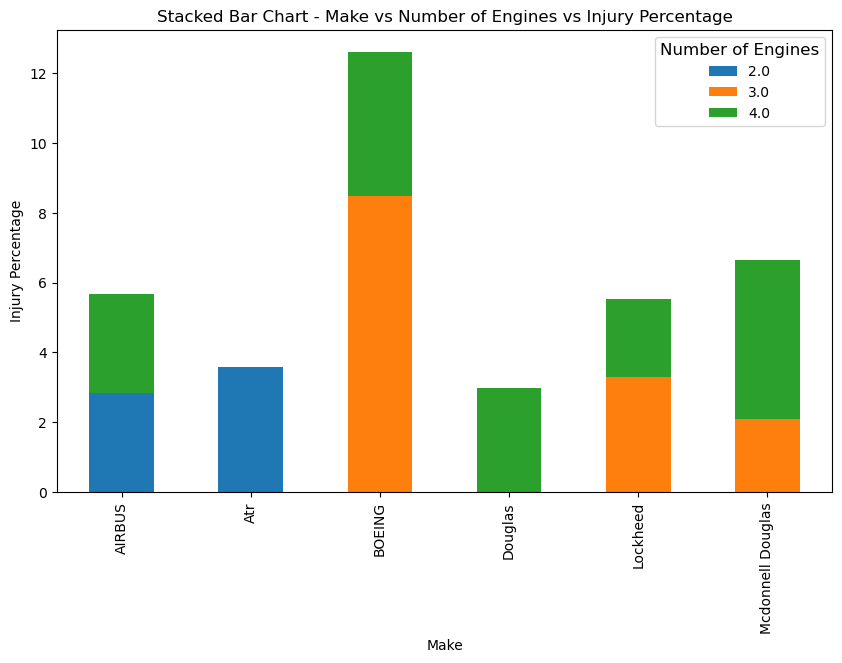

In [12]:
pivot_df = Consolidated_filter.pivot_table(index='Make', columns='Number.of.Engines', values='Injury Percentage', aggfunc='sum', fill_value=0)

# Plot the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart - Make vs Number of Engines vs Injury Percentage')
plt.xlabel('Make')
plt.ylabel('Injury Percentage')
plt.legend(title='Number of Engines', title_fontsize='12')
plt.show()

##### The above graph shows that Boeing aircrafts have the highest injury percentage per crash with both 3 and 4 engine planes. Mcdonnell Douglas also has a high injury percentage with their 4 engine aircrafts.  A business takeaway from this display could be to go with AIRBUS for commercial and Lockheed for Military, respectively.

##### The next task is to filter the data to display highest injury rates per non commercial and military aircrafts.

In [13]:
import pandas as pd

# Group by specified columns and aggregate Total Injuries
outcome = planes_df.groupby(['Number.of.Engines', 'Purpose.of.flight', 'Make'])['Total Injuries'].agg(['sum', 'count']).reset_index()

# Rename columns
outcome.columns = ['Number.of.Engines', 'Purpose.of.flight', 'Make', 'Total Injuries', 'Total Incidents']

# Calculate Injury Percentage
outcome['Injury Percentage'] = outcome['Total Injuries'] / outcome['Total Incidents']


# Sort the DataFrame by 'Injury Percentage' in descending order
outcome = outcome[(outcome['Total Incidents'] > 10) & (outcome['Number.of.Engines'] <= 2)]

outcome = outcome.sort_values(by='Total Injuries', ascending=False)

outcome["Make"] = outcome["Make"].replace("CESSNA", "Cessna")
outcome['Make'] = outcome['Make'].str.strip()

outcome["Make"] = outcome["Make"].replace("PIPER", "Piper")
outcome['Make'] = outcome['Make'].str.strip()

outcome["Make"] = outcome["Make"].replace("BEECH", "Beech")
outcome['Make'] = outcome['Make'].str.strip()

# Display the result
outcome


,Number.of.Engines,Purpose.of.flight,Make,Total Injuries,Total Incidents,Injury Percentage
3279,1.0,Personal,Cessna,3660.4,12044,0.303919
6687,1.0,Personal,Piper,2776.2,6942,0.399914
2782,1.0,Personal,Beech,957.6,1942,0.493100
3089,1.0,Personal,Cessna,708.8,2541,0.278945
1561,1.0,Instructional,Cessna,592.6,4169,0.142144
...,...,...,...,...,...,...
2214,1.0,Personal,AMERICAN LEGEND AIRCRAFT CO,0.8,11,0.072727
6921,1.0,Personal,ROCKWELL INTERNATIONAL,0.6,12,0.050000
8716,1.0,Positioning,De Havilland,0.6,13,0.046154
3913,1.0,Personal,EVEKTOR-AEROTECHNIK AS,0.4,15,0.026667


##### Display Count of each Make with 2 or less Engines based on Total Injuries and Total Incidents and filter out any makes with incident count less than 500.

In [14]:
sum_outcome = outcome.groupby(['Make', 'Number.of.Engines'])[['Total Injuries', 'Total Incidents', 'Injury Percentage']].sum().reset_index()
sum_outcome = sum_outcome[sum_outcome['Total Incidents'] > 500]
sum_outcome['Injury Percentage'] = sum_outcome['Total Injuries'] / sum_outcome['Total Incidents']
sum_outcome.sort_values(by='Injury Percentage', ascending=False)

,Make,Number.of.Engines,Total Injuries,Total Incidents,Injury Percentage
40,Beech,2.0,1028.8,1804,0.570288
69,Cessna,2.0,1189.2,2119,0.561208
165,Piper,2.0,1016.0,1969,0.515998
39,Beech,1.0,1426.2,3051,0.467453
155,Mooney,1.0,459.0,1064,0.431391
43,Bell,1.0,670.0,1738,0.385501
164,Piper,1.0,4310.2,12061,0.357367
45,Bellanca,1.0,284.8,850,0.335059
131,Hughes,1.0,207.4,734,0.282561
68,Cessna,1.0,6420.4,23435,0.273966


##### Visualize the above data in a graph best fitting

<Figure size 1200x800 with 0 Axes>

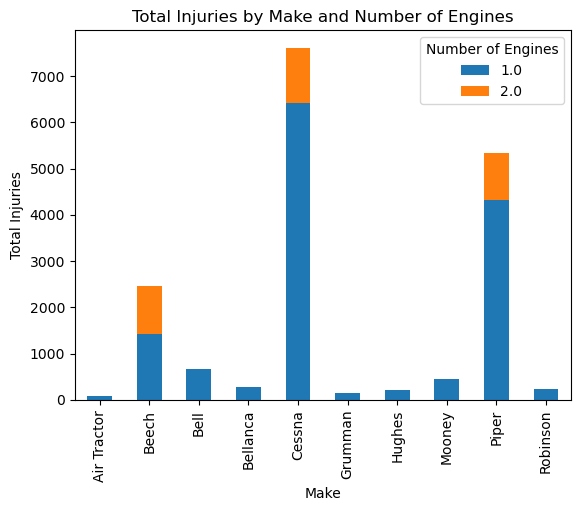

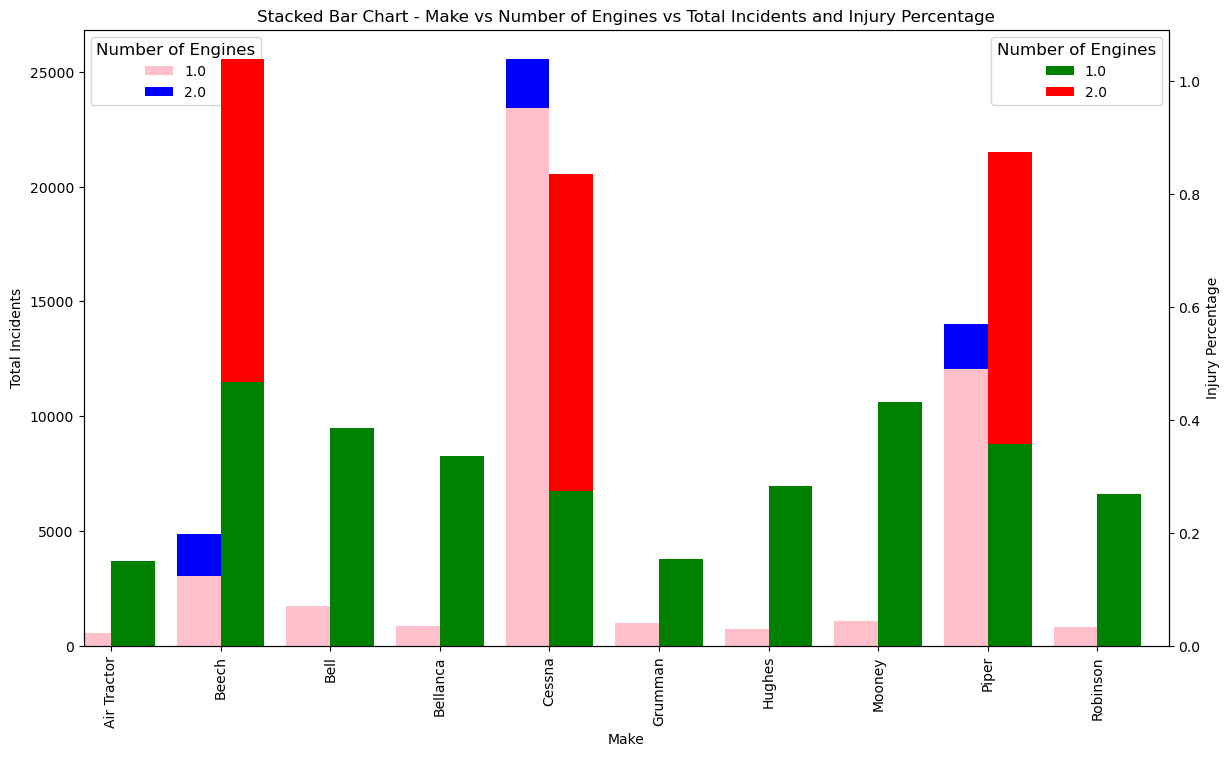

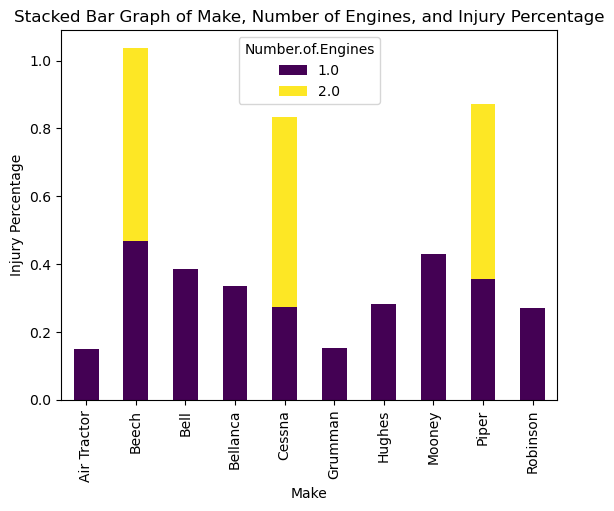

In [64]:
# Plot 1: Bar Plot for Total Injuries
plt.figure(figsize=(12, 8))
bar_plot = sum_outcome.groupby(['Make', 'Number.of.Engines'])['Total Injuries'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('Total Injuries by Make and Number of Engines')
plt.xlabel('Make')
plt.ylabel('Total Injuries')
plt.legend(title='Number of Engines')
plt.show()

# Plot 2: Bar Plot for Total Incidents and Injury Percentage
# Pivot the data for stacked bar chart
pivot_df2 = sum_outcome.pivot_table(index='Make', columns='Number.of.Engines', values=['Total Incidents', 'Injury Percentage'], aggfunc='sum', fill_value=0)

# Plot the stacked bar chart with secondary y-axis for Injury Percentage
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Total Incidents on primary y-axis
pivot_df2['Total Incidents'].plot(kind='bar', stacked=True, ax=ax1, color=['pink', 'blue'], position=1, width=0.4)

# Create a secondary y-axis for Injury Percentage
ax2 = ax1.twinx()
pivot_df2['Injury Percentage'].plot(kind='bar', stacked=True, ax=ax2, color=['green', 'red'], position=0, width=0.4)

# Set labels and title
ax1.set_title('Stacked Bar Chart - Make vs Number of Engines vs Total Incidents and Injury Percentage')
ax1.set_xlabel('Make')
ax1.set_ylabel('Total Incidents', color='black')
ax2.set_ylabel('Injury Percentage', color='black')

# Set legends
ax1.legend(title='Number of Engines', title_fontsize='12', loc='upper left')
ax2.legend(title='Number of Engines', title_fontsize='12', loc='upper right')

plt.show()

# Plot 3: Stacked Bar Graph for Injury Percentage
# Create a stacked bar graph
pivot_df3 = sum_outcome.pivot(index='Make', columns='Number.of.Engines', values='Injury Percentage')
pivot_df3.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Make')
plt.ylabel('Injury Percentage')
plt.title('Stacked Bar Graph of Make, Number of Engines, and Injury Percentage')

# Show the plot
plt.show()

##### The Above cell shows that amongst personal aircrafts (2 engines or less), Cessnas have the most total injuries but also the most total incidents, meaning Cessna's are used much more frequently.  The results also show that although Cessna's have the most total injuries, Cessna's overall injury perentage is much lower than the other Aircraft Make's with both 1 and 2 engines, including Cessna 2 Engine Planes. Thus, a conclusion could be made that Cessna 1 engine aircrafts are the safest to use.

## Step 2-  Analyze data to show highest rates of injuries among Phase of Flights

#### Next, we will analyze safest and most dangerous aircrafts based on Phases of flight (Cruise, Takeoff, Maneuvering, Landing, etc)


In [60]:
# Group by specified columns and aggregate Total Injuries
num_phase = planes_df.groupby(['Broad.phase.of.flight'])['Total Injuries'].agg(['sum', 'count']).reset_index()

# Rename columns
num_phase.columns = ['Broad.phase.of.flight', 'Total Injuries', 'Total Incidents']

# Calculate Injury Percentage
num_phase['Injury Percentage'] = num_phase['Total Injuries'] / num_phase['Total Incidents']

num_phase.sort_values(by='Total Injuries', ascending=False)

,Broad.phase.of.flight,Total Injuries,Total Incidents,Injury Percentage
2,Cruise,5483.2,10269,0.533957
9,Takeoff,4828.6,12493,0.386504
6,Maneuvering,4354.6,8144,0.534700
0,Approach,3578.4,6546,0.546654
1,Climb,1492.0,2034,0.733530
5,Landing,1446.2,15428,0.093739
3,Descent,936.6,1887,0.496343
4,Go-around,631.8,1353,0.466962
11,Unknown,472.4,548,0.862044
8,Standing,272.4,945,0.288254


### Create Visualization of above Data on Broad Phase of Flights

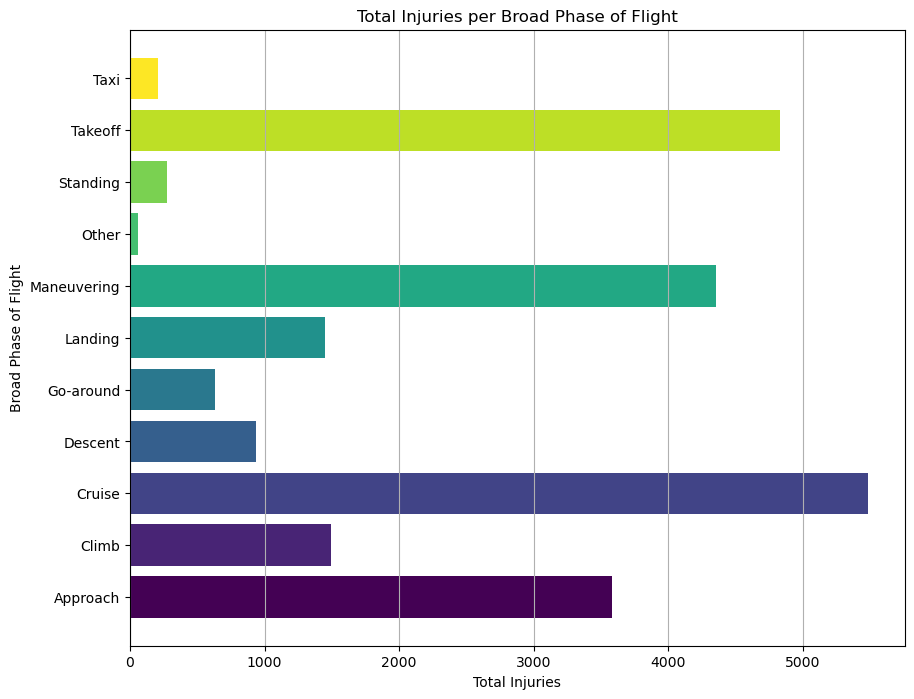

In [62]:
import numpy as np

filtered_num_phase = num_phase[num_phase['Broad.phase.of.flight'] != 'Unknown']

# Color
num_colors = len(filtered_num_phase['Broad.phase.of.flight'])
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))

# Plotting
plt.figure(figsize=(10, 8))
bar = plt.barh(filtered_num_phase['Broad.phase.of.flight'], filtered_num_phase['Total Injuries'], color=colors)
plt.xlabel('Total Injuries')
plt.ylabel('Broad Phase of Flight')
plt.title('Total Injuries per Broad Phase of Flight')
plt.grid(axis='x')

# Show
plt.show()

### Now that we have a general outline of Injury percentages based on phase of flight, we are going to delve deeper and filter the data by make and number of engines.  The idea behind this is to understand which Aircrafts have the highest and lowest injury percentage per phase of flight in order to determine an appropriate resolution for stakeholders.

In [59]:
# Group by specified columns and aggregate Total Injuries
phase_counts = planes_df.groupby(['Broad.phase.of.flight', 'Number.of.Engines', 'Make'])['Total Injuries'].agg(['sum', 'count']).reset_index()

# Rename columns
phase_counts.columns = ['Broad.phase.of.flight', 'Number.of.Engines', 'Make', 'Total Injuries', 'Total Incidents']

# Calculate Injury Percentage
phase_counts['Injury Percentage'] = phase_counts['Total Injuries'] / phase_counts['Total Incidents']

# Sort the DataFrame by 'Injury Percentage' in descending order
phase_counts = phase_counts[(phase_counts['Total Incidents'] > 10) & (phase_counts['Number.of.Engines'] <= 8)]

phase_counts.sort_values(by='Total Injuries', ascending=False)

,Broad.phase.of.flight,Number.of.Engines,Make,Total Injuries,Total Incidents,Injury Percentage
1419,Cruise,1.0,Cessna,1321.0,3170,0.416719
4114,Maneuvering,1.0,Cessna,1072.6,1750,0.612914
5439,Takeoff,1.0,Cessna,970.2,3540,0.274068
1893,Cruise,1.0,Piper,959.4,1732,0.553926
6211,Takeoff,1.0,Piper,753.8,2105,0.358100
...,...,...,...,...,...,...
2965,Landing,1.0,Christen Industries,0.0,14,0.000000
6947,Taxi,2.0,Douglas,0.0,11,0.000000
2850,Landing,1.0,American Champion (acac),0.0,15,0.000000
3104,Landing,1.0,Fairchild,0.0,14,0.000000


#### Filter dataframe "phase counts" for Total Incidents over 500 to remove outliers 

In [70]:
#create filtered_phase to show injury percentage per phase of flight for incident counts over 500
filtered_phase = phase_counts.groupby(['Broad.phase.of.flight', 'Number.of.Engines', 'Make'])[['Total Injuries', 'Total Incidents', 'Injury Percentage']].sum().reset_index()
filtered_phase = filtered_phase[filtered_phase['Total Incidents'] > 500]
filtered_phase['Injury Percentage'] = filtered_phase['Total Injuries'] / filtered_phase['Total Incidents']
filtered_phase.sort_values(by='Injury Percentage', ascending=False)



,Broad.phase.of.flight,Number.of.Engines,Make,Total Injuries,Total Incidents,Injury Percentage
234,Maneuvering,1.0,Cessna,1072.6,1750,0.612914
72,Cruise,1.0,Beech,302.6,513,0.589864
258,Maneuvering,1.0,Piper,578.4,991,0.583653
98,Cruise,1.0,Piper,959.4,1732,0.553926
302,Takeoff,1.0,Beech,262.4,538,0.487732
24,Approach,1.0,Piper,445.8,970,0.459588
76,Cruise,1.0,Cessna,1321.0,3170,0.416719
230,Maneuvering,1.0,Bell,246.4,600,0.410667
327,Takeoff,1.0,Piper,753.8,2105,0.358100
11,Approach,1.0,Cessna,629.4,1807,0.348312


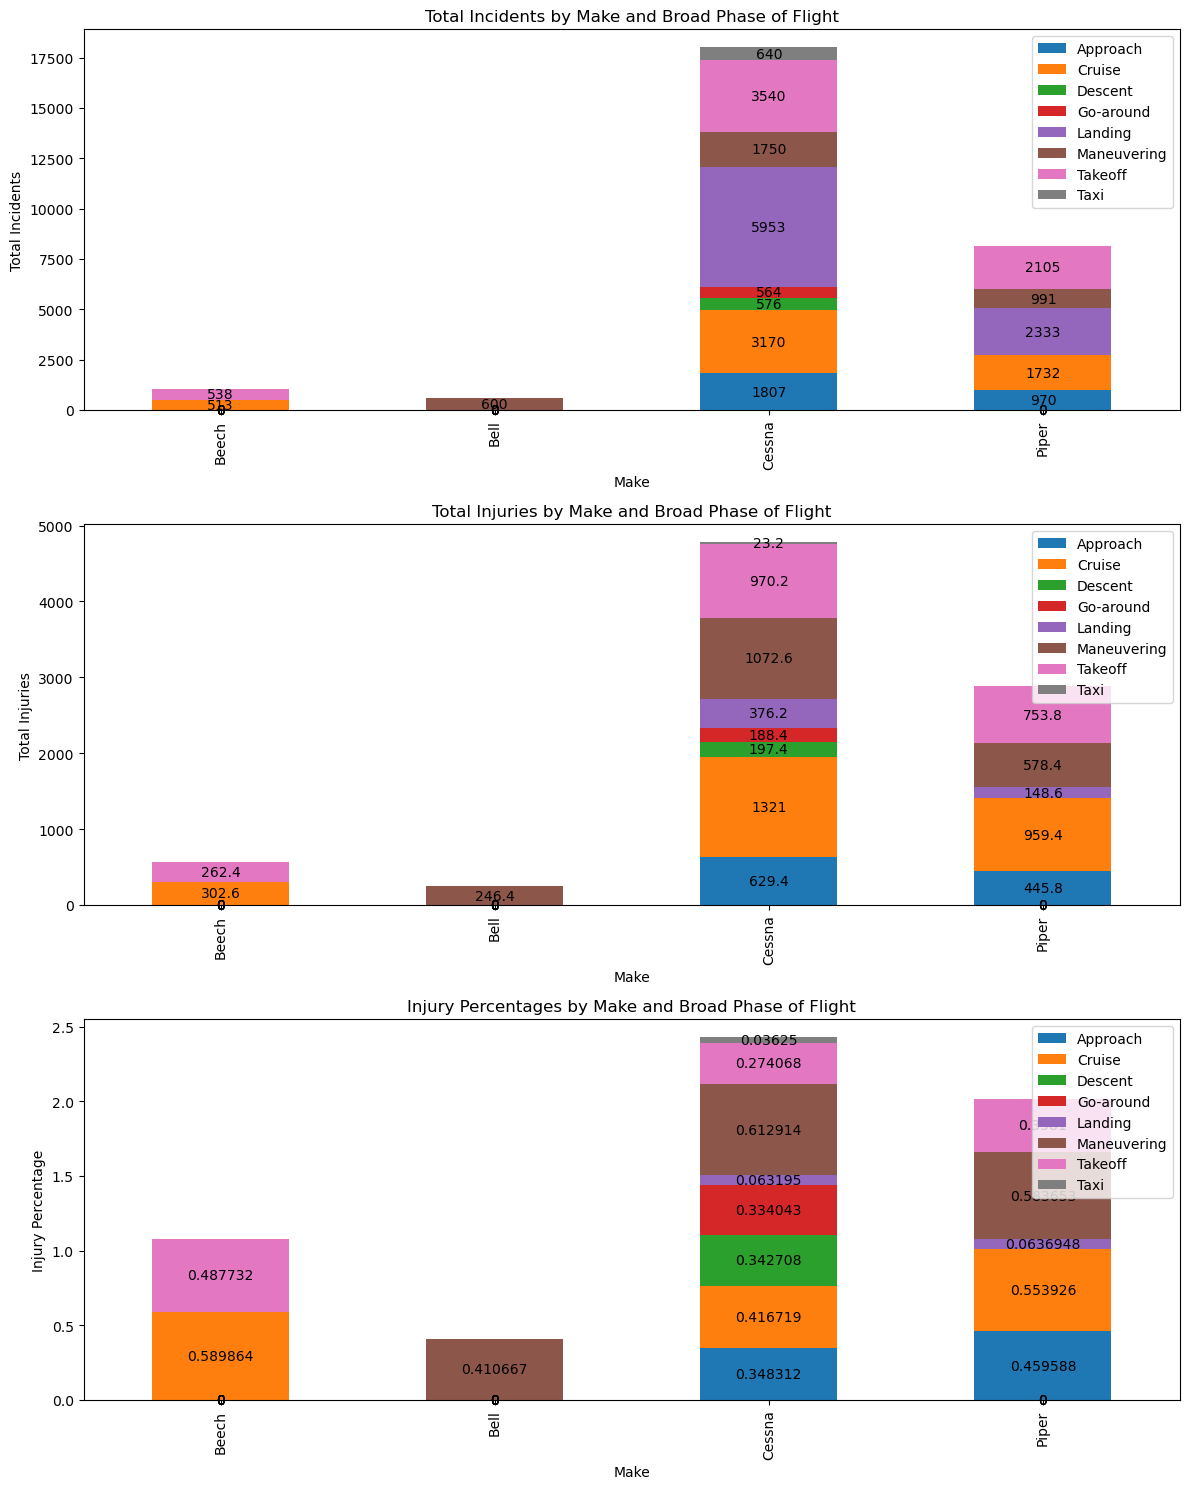

In [81]:
import matplotlib.pyplot as plt

# Assuming filtered_phase, pivot_incidents, pivot_injuries, and pivot_percentage are already defined as per your code

# Creating subplots for three plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

# Plotting Total Incidents with labels
pivot_incidents.plot(kind='bar', stacked=True, ax=axes[0], title='Total Incidents by Make and Broad Phase of Flight')
axes[0].set_ylabel('Total Incidents')
axes[0].legend(loc='upper right')
for container in axes[0].containers:
    axes[0].bar_label(container, label_type='center')

# Plotting Total Injuries with labels
pivot_injuries.plot(kind='bar', stacked=True, ax=axes[1], title='Total Injuries by Make and Broad Phase of Flight')
axes[1].set_ylabel('Total Injuries')
axes[1].legend(loc='upper right')
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='center')

# Plotting Injury Percentage with percentage labels
pivot_percentage.plot(kind='bar', stacked=True, ax=axes[2], title='Injury Percentages by Make and Broad Phase of Flight')
axes[2].set_ylabel('Injury Percentage')
axes[2].legend(loc='upper right')
for container in axes[2].containers:
    axes[2].bar_label(container, label_type='center')

plt.tight_layout()
plt.show()


### Based on the above data and charts, Cessna has a higher overall injury percentage for the 5 most prevalent common phases of flight.  
#### One may also deduce that, based on the findings, both Cessna and Piper are safest with their landing procedures, as both have the highest incident count and lowest injury totals for all "landing" phases of flight.  

### Contrastingly, Cessna's "Maneuvering" phase of flight has the highest injury percentage by far with the lowest amount of incidents.  
#### Apart of "Maneuvering" resulting in many injuries, it appears that the "Cruise" phase of flight results in a large percentage of injuries for both Cessna and Piper, with Cessna's largest amount of injuries and second highest percentage all coming from flights in the "Cruise" phase of flight.

## Next, an Analysis on Injuries based on Engine Type

In [45]:

# Group by 'Engine.Type' and aggregate 'Total Injuries'
engine_injure = planes_df.groupby('Engine.Type')['Total Injuries'].agg(['sum', 'count']).reset_index()

# Calculate Injury Percentage correctly
# 'sum' refers to the total injuries, and 'count' refers to the number of incidents
engine_injure['Injury Percentage'] = engine_injure['sum'] / engine_injure['count']

# Rename columns to make them more descriptive
engine_injure.columns = ['Engine.Type', 'Total Injuries', 'Total Incidents', 'Injury Percentage']

engine_injure.sort_values(by='Total Injuries', ascending=False)




,Engine.Type,Total Injuries,Total Incidents,Injury Percentage
6,Reciprocating,23033.8,69530,0.331279
7,Turbo Fan,4152.2,2481,1.673599
12,Unknown,3065.0,2051,1.494393
9,Turbo Prop,1992.0,3391,0.587437
10,Turbo Shaft,1816.4,3609,0.503297
8,Turbo Jet,684.6,703,0.973826
3,LR,9.0,2,4.500000
5,None,7.0,19,0.368421
0,Electric,1.6,10,0.160000
2,Hybrid Rocket,0.8,1,0.800000


### Create Visualization to display above initial findings

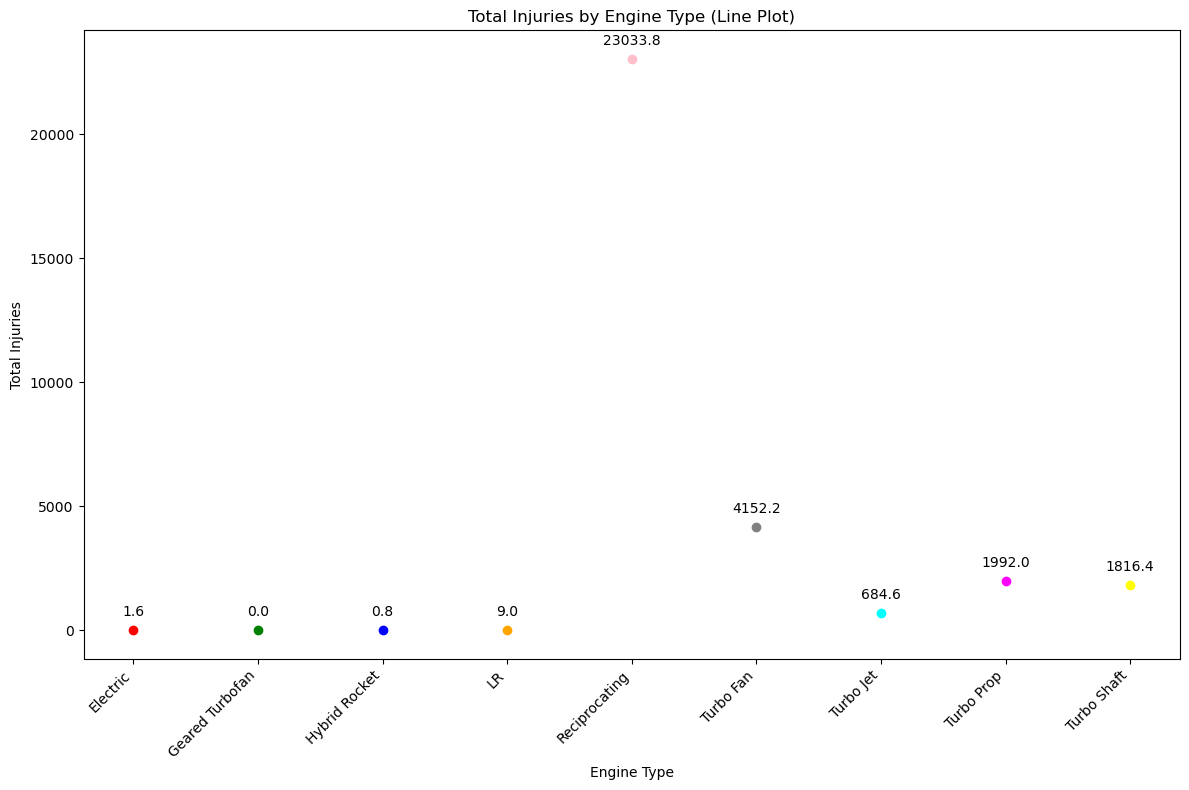

In [58]:
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Assuming Engine_filtered['Engine.Type'] is categorical and you want each category to have its own color
# First, ensure 'Engine.Type' is sorted if it isn't already, as you've done
Engine_filtered = engine_injure.sort_values(by='Engine.Type')

Engine_filtered = Engine_filtered[~Engine_filtered['Engine.Type'].str.lower().isin(['none', 'unk', 'unknown'])]


# Plot each point individually
for i, row in Engine_filtered.iterrows():
    plt.plot(row['Engine.Type'], row['Total Injuries'], marker='o', linestyle='', color=colors2[i % len(colors2)])

plt.xlabel('Engine Type')  # X-axis label
plt.ylabel('Total Injuries')  # Y-axis label
plt.title('Total Injuries by Engine Type (Line Plot)')  # Chart title

# Fix for the xticks error: manually set the ticks and labels
ticks = range(len(Engine_filtered['Engine.Type'].unique()))
labels = Engine_filtered['Engine.Type'].unique()
plt.xticks(ticks, labels, rotation=45, ha="right")

# Adding text labels for each marker
for i, txt in enumerate(Engine_filtered['Total Injuries']):
    # Adjusting the annotation to align with the corrected ticks
    plt.annotate(f"{txt:.1f}", (ticks[i % len(ticks)], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


### Investigate further by analyzing total injuries, incidents, and injury percentage by engine type with make and number of engines

In [ ]:
 #Group by specified columns and aggregate Total Injuries
engine_t_outcome = planes_df.groupby(['Number.of.Engines', 'Engine.Type', 'Make'])['Total Injuries'].agg(['sum', 'count']).reset_index()

# Rename columns
engine_t_outcome.columns = ['Number.of.Engines', 'Engine.Type', 'Make', 'Total Injuries', 'Total Incidents']

# Calculate Injury Percentage
engine_t_outcome['Injury Percentage'] = engine_t_outcome['Total Injuries'] / engine_t_outcome['Total Incidents']

engine_t_outcome = engine_t_outcome[(engine_t_outcome['Total Injuries'] > 200) & (engine_t_outcome['Number.of.Engines'] >= 1)]


engine_t_outcome["Make"] = engine_t_outcome["Make"].replace("CESSNA", "Cessna")
engine_t_outcome['Make'] = engine_t_outcome['Make'].str.strip()

engine_t_outcome["Make"] = engine_t_outcome["Make"].replace("PIPER", "Piper")
engine_t_outcome['Make'] = engine_t_outcome['Make'].str.strip()

engine_t_outcome["Make"] = engine_t_outcome["Make"].replace("BEECH", "Beech")
engine_t_outcome['Make'] = engine_t_outcome['Make'].str.strip()

engine_t_outcome["Make"] = engine_t_outcome["Make"].replace("Boeing", "BOEING")
engine_t_outcome['Make'] = engine_t_outcome['Make'].str.strip()

engine_t_outcome.sort_values(by='Total Injuries', ascending=False)



,Number.of.Engines,Engine.Type,Make,Total Injuries,Total Incidents,Injury Percentage
1372,1.0,Reciprocating,Cessna,5373.2,19642,0.273557
4972,1.0,Reciprocating,Piper,3612.0,9893,0.365107
843,1.0,Reciprocating,Beech,1172.8,2522,0.465028
1170,1.0,Reciprocating,Cessna,931.6,3499,0.266247
7566,2.0,Reciprocating,Cessna,913.4,1680,0.543690
7654,2.0,Reciprocating,Piper,854.0,1704,0.501174
8122,4.0,Turbo Fan,BOEING,709.4,144,4.926389
7553,2.0,Reciprocating,Beech,634.6,1169,0.542857
7725,2.0,Turbo Fan,BOEING,618.8,421,1.469834
4814,1.0,Reciprocating,Piper,615.0,1972,0.311866


### Filter overall results by best fitting cases which, in this instance, is Total Injuries over 200

In [ ]:
engine_t_filter_outcome = engine_t_outcome.groupby(['Number.of.Engines', 'Engine.Type', 'Make'])[['Total Injuries', 'Total Incidents', 'Injury Percentage']].sum().reset_index()
engine_t_filter_outcome = engine_t_filter_outcome[engine_t_filter_outcome['Total Injuries'] > 200]
engine_t_filter_outcome['Injury Percentage'] = engine_t_filter_outcome['Total Injuries'] / engine_t_filter_outcome['Total Incidents']
engine_t_filter_outcome.sort_values(by='Injury Percentage', ascending=False)

,Number.of.Engines,Engine.Type,Make,Total Injuries,Total Incidents,Injury Percentage
16,4.0,Turbo Fan,BOEING,709.4,144,4.926389
10,2.0,Turbo Fan,Airbus Industrie,238.2,86,2.769767
15,3.0,Turbo Fan,Mcdonnell Douglas,230.6,101,2.283168
14,3.0,Turbo Fan,BOEING,353.6,178,1.986517
12,2.0,Turbo Fan,Mcdonnell Douglas,281.8,145,1.943448
11,2.0,Turbo Fan,BOEING,870.2,609,1.428900
13,2.0,Turbo Prop,Beech,308.0,459,0.671024
8,2.0,Reciprocating,Cessna,913.4,1680,0.543690
7,2.0,Reciprocating,Beech,634.6,1169,0.542857
6,1.0,Turbo Shaft,Bell,610.2,1217,0.501397


### Filter by Total Injuries, High to low

In [ ]:
engine_t_filter_outcome = engine_t_outcome.groupby(['Number.of.Engines', 'Engine.Type', 'Make'])[['Total Injuries', 'Total Incidents', 'Injury Percentage']].sum().reset_index()
engine_t_filter_outcome = engine_t_filter_outcome[engine_t_filter_outcome['Total Incidents'] > 500]
engine_t_filter_outcome['Injury Percentage'] = engine_t_filter_outcome['Total Injuries'] / engine_t_filter_outcome['Total Incidents']
engine_t_filter_outcome.sort_values(by='Total Injuries', ascending=False)

,Number.of.Engines,Engine.Type,Make,Total Injuries,Total Incidents,Injury Percentage
2,1.0,Reciprocating,Cessna,6304.8,23141,0.272451
4,1.0,Reciprocating,Piper,4227.0,11865,0.356258
0,1.0,Reciprocating,Beech,1386.0,3003,0.461538
8,2.0,Reciprocating,Cessna,913.4,1680,0.543690
11,2.0,Turbo Fan,BOEING,870.2,609,1.428900
9,2.0,Reciprocating,Piper,854.0,1704,0.501174
7,2.0,Reciprocating,Beech,634.6,1169,0.542857
6,1.0,Turbo Shaft,Bell,610.2,1217,0.501397
3,1.0,Reciprocating,Mooney,465.8,1076,0.432900
1,1.0,Reciprocating,Bellanca,293.2,875,0.335086


In [ ]:
engine_t_filter_outcome = engine_t_outcome.groupby(['Number.of.Engines', 'Engine.Type', 'Make'])[['Total Injuries', 'Total Incidents', 'Injury Percentage']].sum().reset_index()
engine_t_filter_outcome = engine_t_filter_outcome[engine_t_filter_outcome['Total Incidents'] > 500]
engine_t_filter_outcome['Injury Percentage'] = engine_t_filter_outcome['Total Injuries'] / engine_t_filter_outcome['Total Incidents']
engine_t_filter_outcome.sort_values(by='Injury Percentage', ascending=False)

,Number.of.Engines,Engine.Type,Make,Total Injuries,Total Incidents,Injury Percentage
11,2.0,Turbo Fan,BOEING,870.2,609,1.428900
8,2.0,Reciprocating,Cessna,913.4,1680,0.543690
7,2.0,Reciprocating,Beech,634.6,1169,0.542857
6,1.0,Turbo Shaft,Bell,610.2,1217,0.501397
9,2.0,Reciprocating,Piper,854.0,1704,0.501174
0,1.0,Reciprocating,Beech,1386.0,3003,0.461538
3,1.0,Reciprocating,Mooney,465.8,1076,0.432900
4,1.0,Reciprocating,Piper,4227.0,11865,0.356258
1,1.0,Reciprocating,Bellanca,293.2,875,0.335086
2,1.0,Reciprocating,Cessna,6304.8,23141,0.272451


### Create visualization to represent 

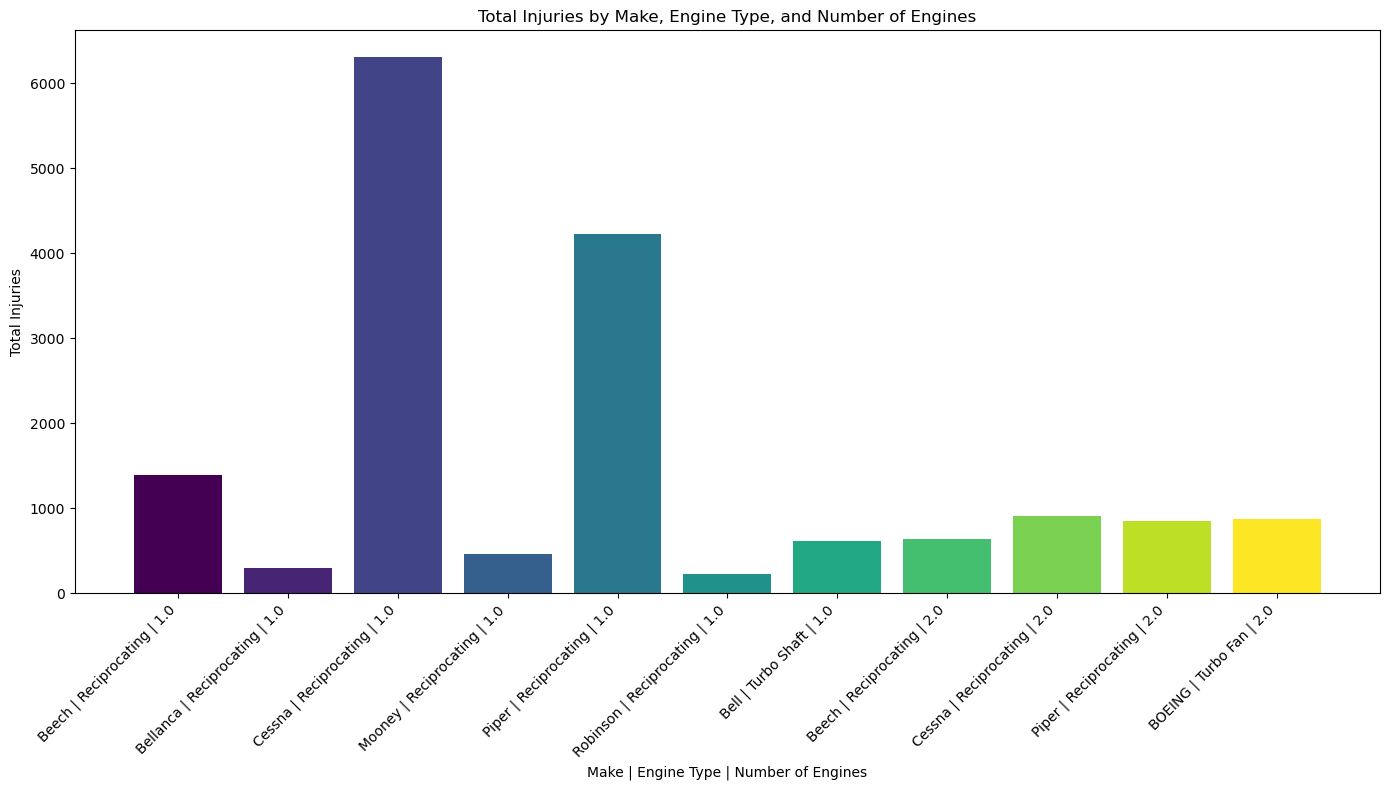

In [ ]:
import numpy as np

# Creating a new column for the X-axis labels
engine_t_filter_outcome['Label'] = engine_t_filter_outcome['Make'] + ' | ' + engine_t_filter_outcome['Engine.Type'] + ' | ' + engine_t_filter_outcome['Number.of.Engines'].astype(str)

# Use a colormap to generate a list of colors based on the number of unique labels
colors = plt.cm.viridis(np.linspace(0, 1, len(engine_t_filter_outcome['Label'])))

# Plotting
plt.figure(figsize=(14, 8))  # Adjust the size as needed
plt.bar(engine_t_filter_outcome['Label'], engine_t_filter_outcome['Total Injuries'], color=colors)  # Pass the list of colors here
plt.xlabel('Make | Engine Type | Number of Engines')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45, ha="right")  # Rotate labels to avoid overlap
plt.title('Total Injuries by Make, Engine Type, and Number of Engines')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()

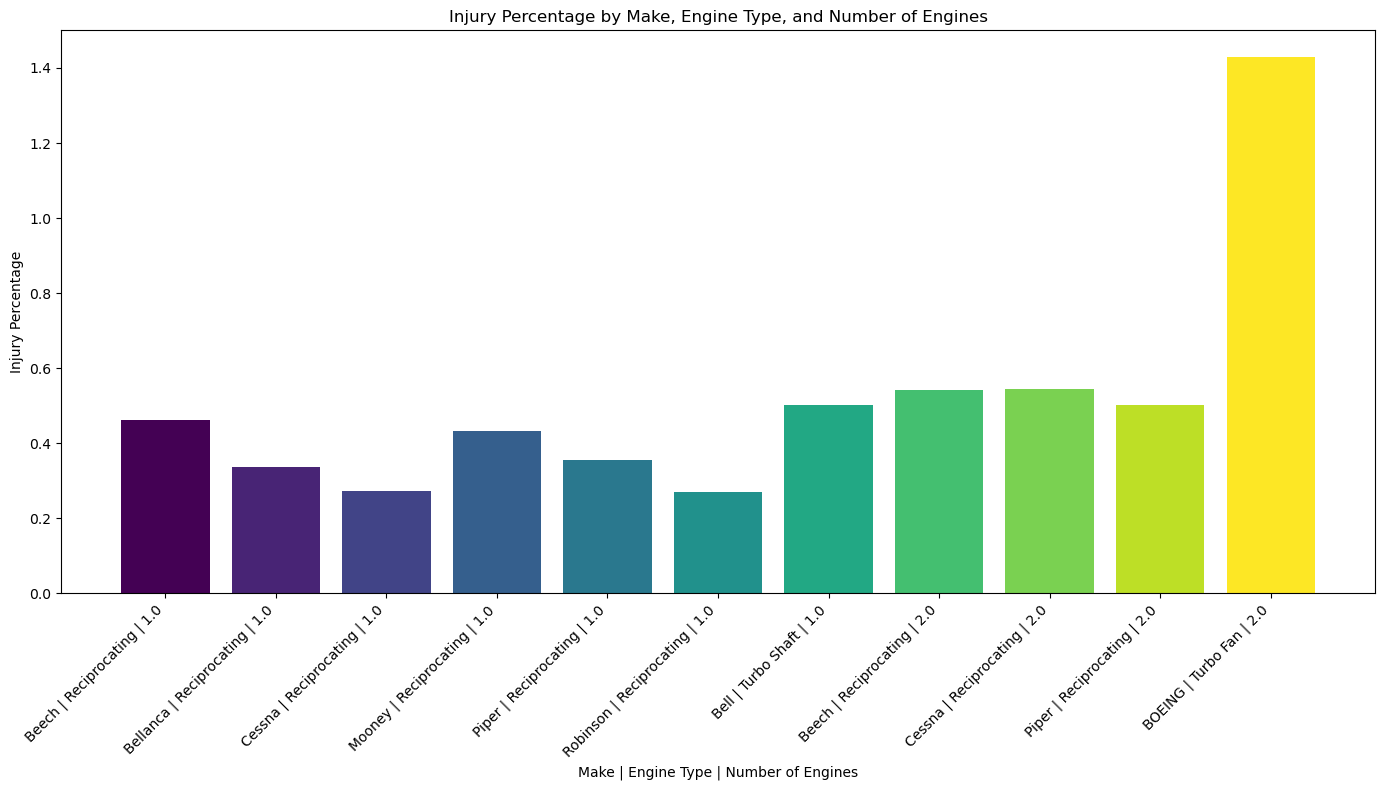

In [ ]:
# Creating a new column for the X-axis labels
engine_t_filter_outcome['Label'] = engine_t_filter_outcome['Make'] + ' | ' + engine_t_filter_outcome['Engine.Type'] + ' | ' + engine_t_filter_outcome['Number.of.Engines'].astype(str)

# Use a colormap to generate a list of colors based on the number of unique labels
colors = plt.cm.viridis(np.linspace(0, 1, len(engine_t_filter_outcome['Label'])))

# Plotting
plt.figure(figsize=(14, 8))  # Adjust the size as needed
plt.bar(engine_t_filter_outcome['Label'], engine_t_filter_outcome['Injury Percentage'], color=colors)  # Pass the list of colors here
plt.xlabel('Make | Engine Type | Number of Engines')
plt.ylabel('Injury Percentage')
plt.xticks(rotation=45, ha="right")  # Rotate labels to avoid overlap
plt.title('Injury Percentage by Make, Engine Type, and Number of Engines')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()

#### Based on the above data on enginge types, although Cessna Reciprocating 1 engine planes have the most injuries, they appear to also be the safest to fly based on the amount of incidents and resulting low injury percentage (just under 30%)

# Conclusion


## The main takeaways one could assume based on the above data and visualizations are as follows:

#### -Airbus appears to be the safest choice for Commercial Airline travel and Lockheed for Military Travel/Transport, as Boeing and Mcdonnell Douglas both have high injury percentages for multiple engine type air carriers.

#### -Cessna 1 Engine and both Cessna and Piper 2 Engine appear to be the safest choices for personal aircraft travel, with Cessna 1 engine planes having a high injury total but the lowest injury percentage, and Cessna and Piper 2 engine planes having the lowest injury percentage amongst the respective group.  

#### -When it comes to phase of flight, both Cessna and Piper are safest with their landing procedures, as both have the highest incident count and lowest injury totals for all "landing" phases of flight.  Contrastingly, Cessna's "Maneuvering" phase of flight has the highest injury percentage by far with the lowest amount of incidents.  Apart of "Maneuvering" resulting in many injuries, it appears that the "Cruise" phase of flight results in a large percentage of injuries for both Cessna and Piper, with Cessna's largest amount of injuries and second highest percentage all coming from flights in the "Cruise" phase of flight.    
##### -One solution to this issue would be to implement more training programs for pilots pertaining to the "Maneuvering" phase of flight, as Cessna aircrafts have the highest injury percentage in this phase by far.  

#### -Finally, regarding engine type, although Cessna Reciprocating 1 engine planes have the most injuries, they appear to also be the safest to fly based on the amount of incidents and resulting low injury percentage (just under 30%)